In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set paths to your dataset
real_images_path = 'D:/major project/archive-2/Test/real'
fake_images_path = 'D:/major project/archive-2/Test/fake'

# Load images and labels
def load_images(image_path, label):
    images = []
    labels = []
    for img in os.listdir(image_path):
        img_path = os.path.join(image_path, img)
        img = image.load_img(img_path, target_size=(128, 128))  # Resize to 128x128
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

real_images, real_labels = load_images(real_images_path, 0)  # 0 for real
fake_images, fake_labels = load_images(fake_images_path, 1)  # 1 for fake

# Combine and preprocess the dataset
X = np.array(real_images + fake_images)
y = np.array(real_labels + fake_labels)

# Normalize the images
X = X / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Load MobileNet without the top layer and freeze its layers
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
mobilenet_base.trainable = False  # Freeze MobileNet layers

# Create a new model with MobileNet as the base
model = Sequential([
    mobilenet_base,
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred).astype(int)  # Round the probabilities to get binary output

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=["Real", "Fake"]))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Function to predict if an image is real or fake
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return 'Real' if prediction[0][0] < 0.5 else 'Fake'

# Visualize training history
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 334ms/step - accuracy: 0.6347 - loss: 1.1993 - val_accuracy: 0.7539 - val_loss: 0.4898
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - accuracy: 0.7628 - loss: 0.4785 - val_accuracy: 0.7800 - val_loss: 0.4394
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 50s 364ms/step - accuracy: 0.7943 - loss: 0.4401 - val_accuracy: 0.7791 - val_loss: 0.4295
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 304ms/step - accuracy: 0.8088 - loss: 0.4014 - val_accuracy: 0.7951 - val_loss: 0.4231
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 286ms/step - accuracy: 0.8183 - loss: 0.3793 - val_accuracy: 0.7892 - val_loss: 0.4325
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 314ms/step - accuracy: 0.8423 - loss: 0.3502 - val_accuracy: 0.7924 - val_loss: 0.4433
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 313ms/step - accuracy: 0.8406 - loss: 0.3439 - val_accuracy: 0.7951 - val_loss: 0.4248
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 44s 322ms/step - accuracy: 0.8463 - loss: 0

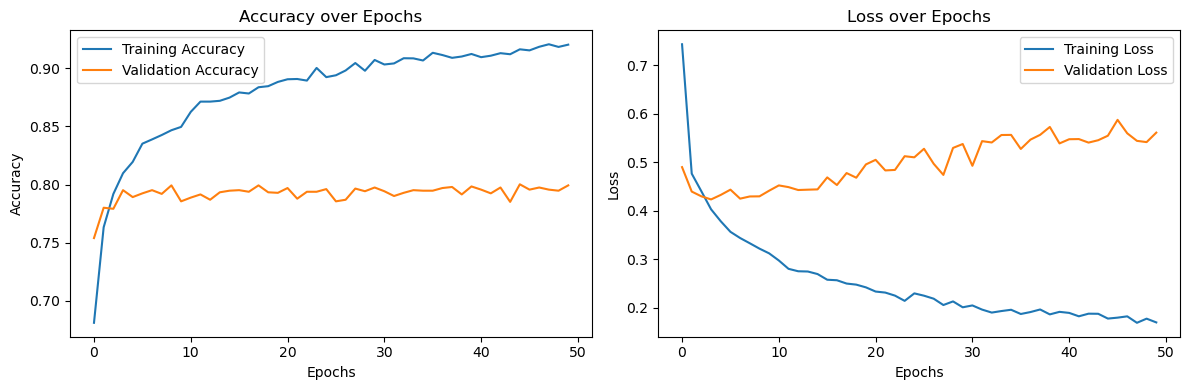

In [24]:
# Plot training history
plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

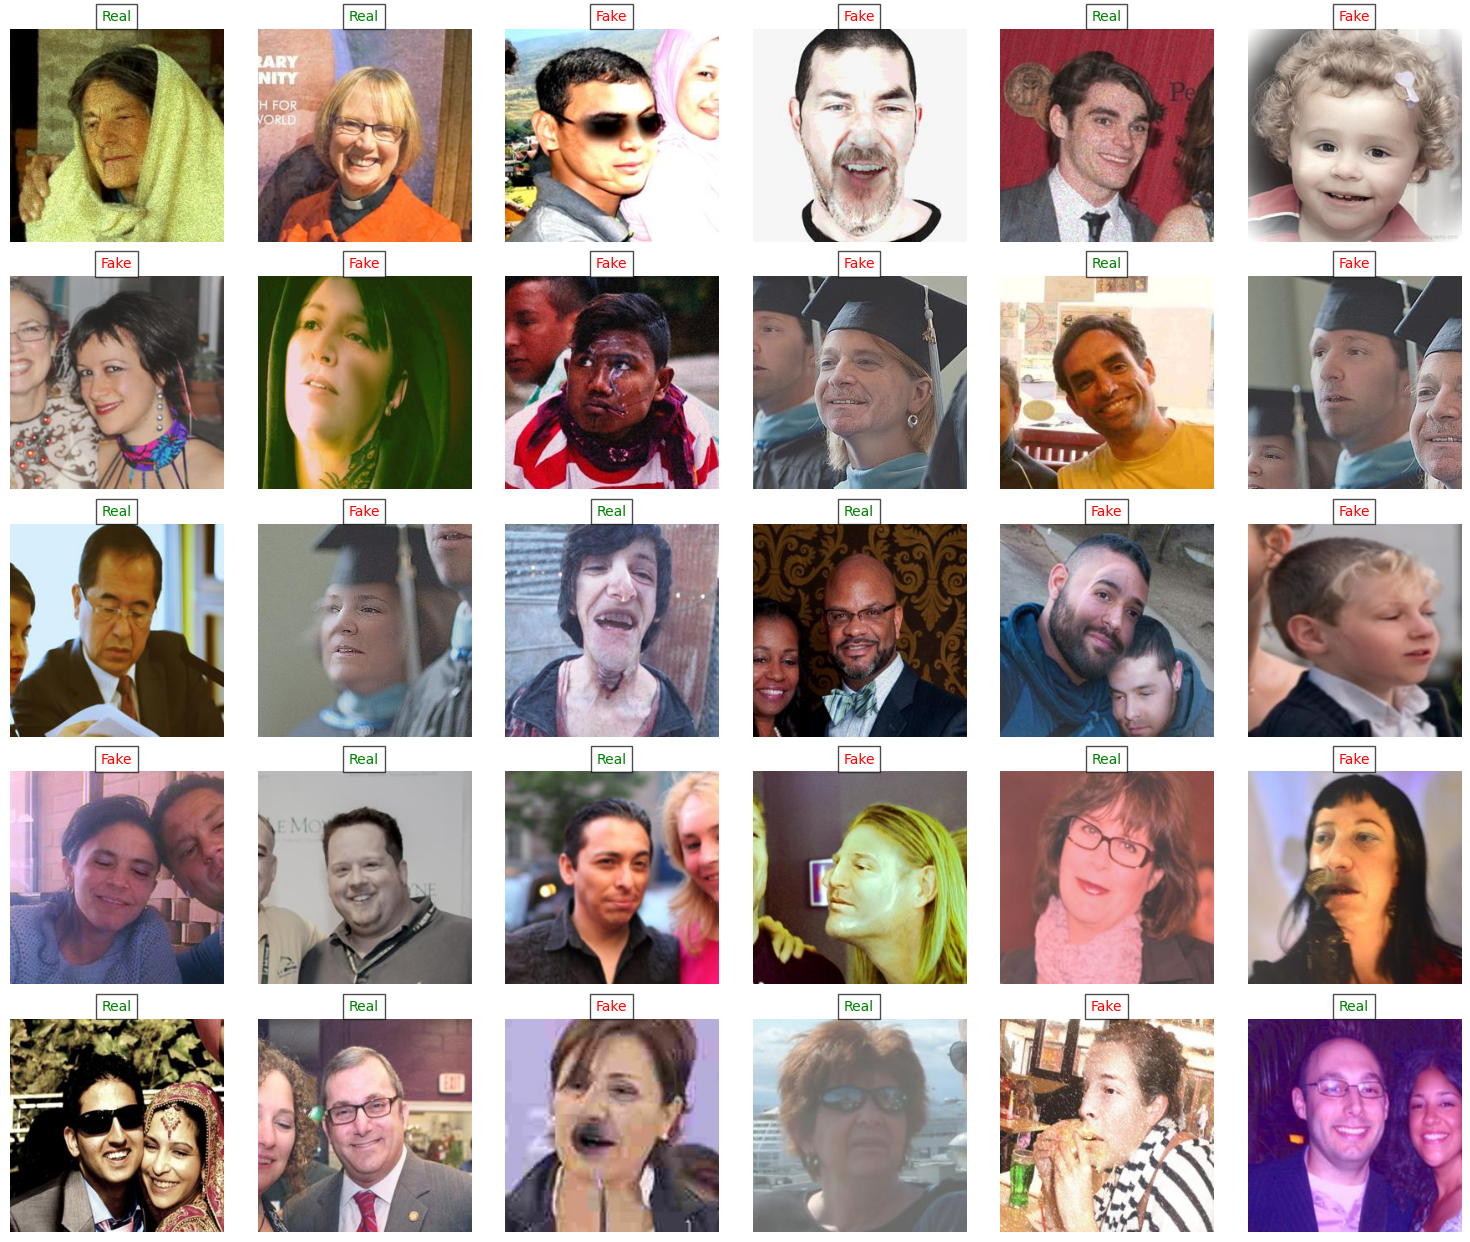

In [5]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Function to display multiple images with predictions
def display_images_with_predictions(img_folder, model, num_images=100):
    # Get a list of image paths
    img_paths = [os.path.join(img_folder, img) for img in os.listdir(img_folder)][:num_images]
    
    # Set up the grid size
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid size (rows and columns)

    # Create a figure
    plt.figure(figsize=(15, 15))

    for i, img_path in enumerate(img_paths):
        # Load the image using PIL
        img = Image.open(img_path)

        # Predict the image class
        prediction = predict_image(img_path)

        # Choose color based on prediction
        color = 'green' if prediction == "Real" else 'red'

        # Add a subplot for the current image
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(img)
        plt.axis('off')  # Hide the axes

        # Overlay the prediction as text
        plt.title(
            prediction,
            fontsize=10,
            color=color,
            bbox=dict(facecolor='white', alpha=0.7)
        )

    # Adjust layout and display the images
    plt.tight_layout()
    plt.show()

# Folder containing the images
img_folder = 'D:/major project/archive-2/Sample'  # Change to appropriate folder

# Display 30 images with predictions
display_images_with_predictions(img_folder, model, num_images=30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


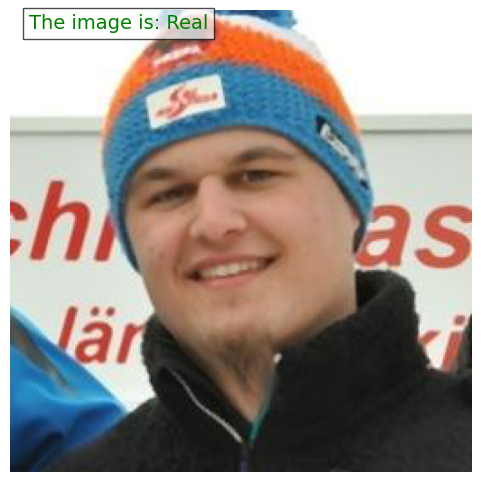

In [20]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Function to display image with prediction
def display_image_with_prediction(img_path, prediction):
    # Load the image using PIL
    img = Image.open(img_path)

    # Set up the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide the axes

    # Overlay the prediction as text
    color = 'green' if prediction == "Real" else 'red'  # Green for Real, Red for Fake
    plt.text(
        10, 10,  # Position (x, y)
        f'The image is: {prediction}',  # Text to display
        fontsize=14, color=color, bbox=dict(facecolor='white', alpha=0.7)
    )

    # Show the image
    plt.show()

# Path to the image
img_path = 'D:/major project/archive-2/Sample/552.jpg'

# Predict the image class
prediction = predict_image(img_path)

# Display the image with the prediction
display_image_with_prediction(img_path, prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


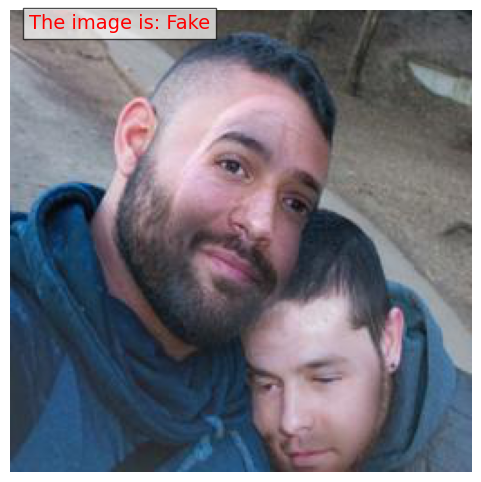

In [21]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Function to predict if an image is real or fake
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Load image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)  # Predict using your trained model
    return 'Real' if prediction[0][0] < 0.5 else 'Fake'

# Function to display image with prediction
def display_image_with_prediction(img_path, prediction):
    # Load the image using PIL
    img = Image.open(img_path)

    # Set up the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide the axes

    # Overlay the prediction as text
    color = 'green' if prediction == "Real" else 'red'  # Green for Real, Red for Fake
    plt.text(
        10, 10,  # Position (x, y)
        f'The image is: {prediction}',  # Text to display
        fontsize=14, color=color, bbox=dict(facecolor='white', alpha=0.7)
    )

    # Show the image
    plt.show()

# Path to the image
img_path = 'D:/major project/archive-2/Test/fake/fake_1344.jpg'

# Predict the image class
prediction = predict_image(img_path)

# Display the image with the prediction
display_image_with_prediction(img_path, prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


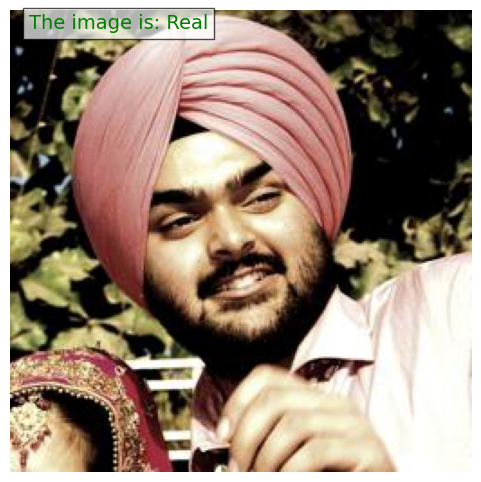

In [36]:
# Path to the image
img_path = 'D:/major project/archive-2/sample/real_352.jpg'

# Predict the image class
prediction = predict_image(img_path)

# Display the image with the prediction
display_image_with_prediction(img_path, prediction)

In [17]:
result = predict_image('D:/major project/archive-2/Test/fake/fake_57.jpg')
print(f'The image is: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The image is: Fake


In [15]:
result = predict_image('D:/major project/archive-2/Test/real/real_1.jpg')
print(f'The image is: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The image is: Real
